In [1]:
from sklearn.datasets import fetch_openml
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [2]:
mnist=fetch_openml('mnist_784',version=1)
mnist.keys()

dict_keys(['data', 'details', 'categories', 'target', 'DESCR', 'frame', 'feature_names', 'target_names', 'url'])

In [3]:
mnist["data"].shape
x,y=mnist["data"],mnist["target"]
np.unique(mnist["target"])

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

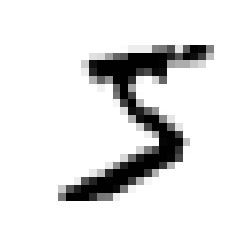

In [4]:
digit=x[0]
image=digit.reshape(28,28)
plt.imshow(image,cmap="binary")
plt.axis("off")
plt.show()


In [5]:
x_train,x_test,y_train,y_test=x[:60000],x[60000:],y[:60000],y[60000:]
y_train_5=(y_train.astype(np.int8)==5)
y_test_5=(y_test.astype(np.int8)==5)
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(x_train,y_train_5)
sgd_clf.predict([digit])

array([ True])

In [6]:
skfolds=StratifiedKFold(n_splits=3,random_state=42)

for train_index,test_index in skfolds.split(x_train,y_train_5):
    clone_clf=clone(sgd_clf)
    x_train_folds=x_train[train_index]
    y_train_folds=y_train_5[train_index]
    x_test_fold=x_train[test_index]
    y_test_fold=y_train_5[test_index]
    
    clone_clf.fit(x_train_folds,y_train_folds)
    y_pred=clone_clf.predict(x_test_fold)
    n_correct=sum(y_pred==y_test_fold)
    print(n_correct/len(y_pred))


/home/jason/Desktop/hand-on-ml/my_env/lib/python3.5/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.95035
0.96035
0.9604


In [7]:
y_train_pred=cross_val_predict(sgd_clf,x_train,y_train_5,cv=3)
precision_score(y_train_5,y_train_pred)
#recall_score(y_train_5,y_train_pred)

0.8370879772350012

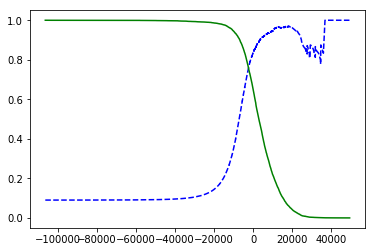

In [8]:
#PR rate
y_scores=cross_val_predict(sgd_clf,x_train,y_train_5,cv=3,method="decision_function")
precisions,recalls,thresholds=precision_recall_curve(y_train_5,y_scores)
plt.plot(thresholds,precisions[:-1],"b--",label="Precision")
plt.plot(thresholds,recalls[:-1],"g-",label="Recall")

In [9]:
threshold_90_precision=thresholds[np.argmax(precisions>=0.9)]
y_train_pred_90=(y_scores>=threshold_90_precision)
precision_score(y_train_5,y_train_pred_90)

0.9000345901072293

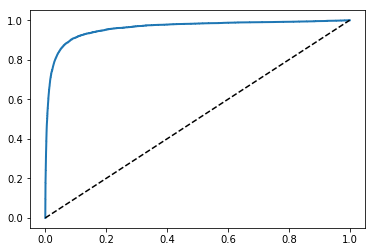

In [10]:
#ROC rate
fpr,tpr,thresholds=roc_curve(y_train_5,y_scores)
plt.plot(fpr,tpr,linewidth=2,label=None)
plt.plot([0,1],[0,1],'k--')

In [11]:
#standardize data
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train.astype(np.float64))
cross_val_score(sgd_clf,x_train_scaled,y_train,cv=3,scoring="accuracy")

KeyboardInterrupt: 

In [12]:
#confusion matrix
x_train_pred=cross_val_predict(sgd_clf,x_train_scaled,y_train,cv=3)
conf_mx=confusion_matrix(y_train,y_train_pred)
conf_mx
plt.matshow(conf_mx,cmap=plt.cm.gray)
plt.show()

NameError: name 'confusion_matrix' is not defined